In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPool2D, Flatten

# Classify CIFAR Images

https://www.tensorflow.org/tutorials/images/cnn#download_and_prepare_the_cifar10_dataset

## Download and prepare the CIFAR10 dataset

In [3]:
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

In [4]:
# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

## Verify the data

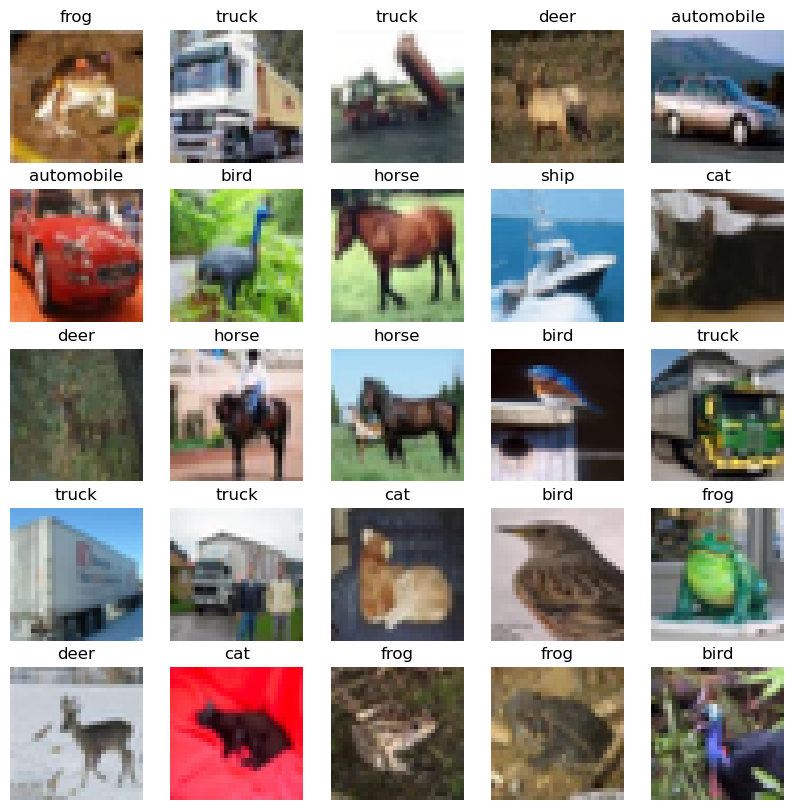

In [5]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))

for i in range(25):
    plt.subplot(5,5,i+1)
    plt.imshow(train_images[i])
    plt.title(class_names[train_labels[i][0]])
    plt.axis('off')
    
plt.show()

## Create the convolutional base

In [6]:
IMAGE_SIZE = (32, 32, 3)

In [14]:
model = Sequential([
    Input(shape=IMAGE_SIZE),
    Conv2D(filters=30, kernel_size=(3, 3), padding='same', activation='relu'),
    MaxPool2D(),
    Conv2D(filters=60, kernel_size=(3, 3), padding='same', activation='relu'),
    MaxPool2D(),
    Conv2D(filters=60, kernel_size=(3, 3), padding='same', activation='relu'),
    
])

In [15]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 32, 32, 30)        840       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 16, 16, 30)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 16, 16, 60)        16260     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 8, 8, 60)         0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 8, 8, 60)          32460     
                                                                 
Total params: 49,560
Trainable params: 49,560
Non-trai

## Add Dense layers on top

In [9]:
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(10))

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 8, 8, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 4096)              0

## Complie and train

In [11]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy'],
)

history = model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

Epoch 1/10
 572/1563 [=========>....................] - ETA: 1:03 - loss: 1.7065 - accuracy: 0.3686

KeyboardInterrupt: 